In [10]:
# Analytics
import pandas as pd
import numpy as np
 
# Plotting
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot
 
# ML
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
 
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [34]:
dataset = pd.read_csv("sonar.all-data",header=None)
dataset = dataset.sample(frac=1, random_state=10).reset_index(drop=True) # shuffling the dataset
X = dataset.iloc[:, : -1]
y = dataset.iloc[:, -1:]

In [35]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

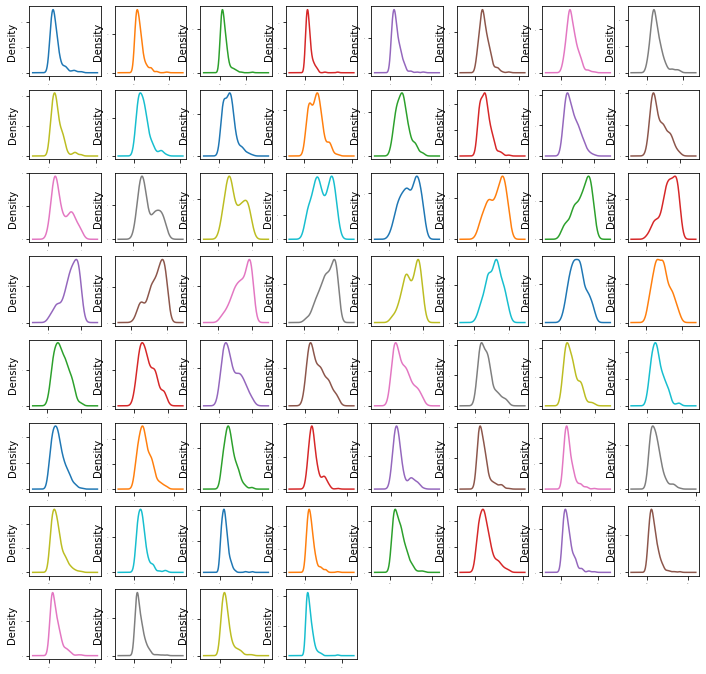

In [36]:
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
pyplot.show()

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Setup a Dummy classifier to compare accuracy

In [38]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf = dummy_clf.fit(X_train, y_train)

In [39]:
pred = dummy_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy {acc:.3f}")

Accuracy 0.524


In [40]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(dummy_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Cross validation: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Cross validation: 0.534 (0.016)


In [41]:
scores = []

### Random Forests

In [43]:
y_train

,60
86,R
203,M
67,M
82,R
205,R
...,...
106,M
14,R
92,R
179,R


In [52]:
random_forest_clf = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=0,)
random_forest_clf = random_forest_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [53]:
pred = random_forest_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy {acc:.3f}")

Accuracy 0.929


In [54]:

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(random_forest_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
scores.append(n_scores)

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.825 (0.066)


### Decision Trees

In [57]:
tree_clf = DecisionTreeClassifier(criterion="gini")
tree_clf.fit(X_train, y_train)
# tree_clf.score(X_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
pred = tree_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy {acc:.3f}")

Accuracy 0.738


In [59]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(tree_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
scores.append(n_scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.761 (0.073)


### SVC

In [60]:
svc = SVC(gamma='auto',C=2)
svc_clf = make_pipeline(StandardScaler(), svc)
svc_clf.fit(X_train, y_train)
# svc_clf.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=2, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [62]:
pred = svc_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy {acc:.3f}")

Accuracy 0.905


In [63]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(svc_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
scores.append(n_scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.867 (0.052)


In [ ]:
scores

[array([0.88095238, 0.76190476, 0.85714286, 0.85365854, 0.82926829,
        0.80952381, 0.83333333, 0.85714286, 0.82926829, 0.80487805,
        0.92857143, 0.83333333, 0.83333333, 0.82926829, 0.7804878 ]),
 array([0.71428571, 0.76190476, 0.69047619, 0.80487805, 0.6097561 ,
        0.73809524, 0.80952381, 0.76190476, 0.63414634, 0.7804878 ,
        0.66666667, 0.69047619, 0.73809524, 0.68292683, 0.73170732]),
 array([0.88095238, 0.83333333, 0.80952381, 0.87804878, 0.87804878,
        0.85714286, 0.9047619 , 0.80952381, 0.82926829, 0.82926829,
        0.95238095, 0.76190476, 0.80952381, 0.85365854, 0.90243902])]

In [64]:
fig = go.Figure()
for model_score in scores:
  fig.add_trace(go.Box(y=model_score))
fig.show()